In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("CodesOnBytes Phase 2-Q1.csv")
df.head() #verifying the dataset

show_id     type                             title         director   
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson  \
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration   
0  United States  9/25/2021          2020  PG-13    90 min  \
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dramas, TV Horror, TV Mysteries  
3                 Children & Family Movies, Comedies  
4   Dramas, Independent Movies, International Movies

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [5]:
df.describe()

release_year
count   8790.000000
mean    2014.183163
std        8.825466
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [6]:
df.rating.value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [7]:
df.type.value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [8]:
#Calculating the percentages for each unique rating value
df.rating.value_counts()/len(df) * 100

rating
TV-MA       36.461889
TV-14       24.539249
TV-PG        9.795222
R            9.089875
PG-13        5.574516
TV-Y7        3.788396
TV-Y         3.481229
PG           3.265074
TV-G         2.502844
NR           0.898749
G            0.466439
TV-Y7-FV     0.068259
NC-17        0.034130
UR           0.034130
Name: count, dtype: float64

In [9]:
#Calculating the percentages for each unique type value
df.type.value_counts()/len(df) * 100

type
Movie      69.692833
TV Show    30.307167
Name: count, dtype: float64

In [10]:
#Calculating the percentages for each unique release_year value
df.release_year.value_counts()/len(df) * 100

release_year
2018    13.037543
2017    11.717861
2019    11.717861
2020    10.841866
2016    10.250284
          ...    
1966     0.011377
1959     0.011377
1925     0.011377
1947     0.011377
1961     0.011377
Name: count, Length: 74, dtype: float64

In [11]:
def get_distplot(col):
    ax = sns.distplot(df[col], bins = 6)
    Q1 = np.percentile(df[col],25)
    Q3 = np.percentile(df[col],75)
    IQR=Q3-Q1    
    lower_threshold = Q1 - 1.5*IQR
    upper_threshold = Q3 + 1.5*IQR
    
    ax.axvline(Q1, color='red', linestyle='-', label="Q1")
    ax.axvline(Q3, color='blue', linestyle='-', label="Q3")
    ax.axvline(lower_threshold, color='yellow', linestyle='-', label="Lower threshold")
    ax.axvline(upper_threshold, color='green', linestyle='-', label="Upper threshold")
    ax.legend()

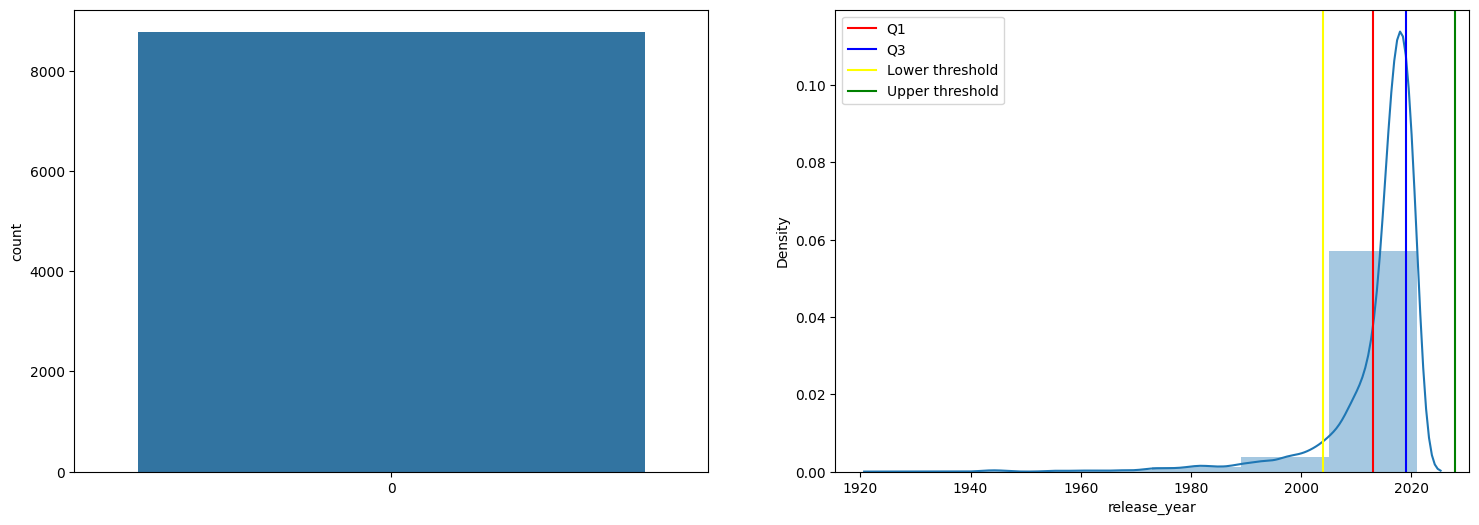

In [12]:
fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(121)
ax1 = sns.countplot(df['release_year'])
ax2 = fig.add_subplot(122)
ax2 = get_distplot('release_year')
plt.show()

In [13]:
#first copy the original dataset to maintain backup

dfML = df.copy()
dfML.head()

show_id     type                             title         director   
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson  \
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration   
0  United States  9/25/2021          2020  PG-13    90 min  \
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dramas, TV Horror, TV Mysteries  
3                 Children & Family Movies, Comedies  
4   Dramas, Independent Movies, International Movies

In [14]:
#Now lets assign a labels to our release_year variable
label_release_year = LabelEncoder()
dfML['release_year'] = label_release_year.fit_transform(dfML['release_year'])
dfML['release_year'].value_counts()

release_year
70    1146
69    1030
71    1030
72     953
68     901
      ... 
18       1
11       1
0        1
6        1
13       1
Name: count, Length: 74, dtype: int64